# **HIGH DIMENSIONAL DATASET HANDLING AND MODEL CREATION**

**Our** aim is to predict sale price of the Buldozers with high dimensional and categorical features.

**data set link : https://www.kaggle.com/c/bluebook-for-bulldozers/**

# Notebook Summary – What Was Done

---

## 1. Loaded Data
- Loaded the dataset from `Train.csv`.
- Suppressed warnings for cleaner output.

---

## 2. Exploratory Data Analysis
- Identified and separated numerical and categorical columns.
- Selected the first 1000 rows of numerical data for correlation analysis.
- Created a heatmap to visualize correlations between numerical features.

---

## 3. Data Cleaning
- Removed identifier and irrelevant columns:
  - `SalesID`, `MachineID`, `ModelID`, `YearMade`
  - `datasource`, `auctioneerID`

---

## 4. Dataset Trimming
- Limited the dataset to the first 10,000 rows to reduce processing time.

---

## 5. Handling Missing Values
- Filled missing values in categorical columns using the most frequent value (mode).

---

## 6. Data Splitting
- Split the dataset into features (`X`) and target (`y = SalePrice`).
- Further split the data into training and test sets using an 80/20 ratio.

---

## 7. Categorical Encoding
- Applied label encoding to categorical columns with low cardinality (fewer than 5 unique values).
- Applied target encoding to high-cardinality categorical columns using the `MachineHoursCurrentMeter` column as a reference.

---


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **IMPORTING DATA**

In [ ]:
import pandas as pd
data = pd.read_csv("Train.csv")

In [ ]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [ ]:
data.shape

(401125, 53)

# **DROPING IRREVALENT FEATURES**

In [ ]:
data = data.drop(["SalesID","MachineID","ModelID","auctioneerID","datasource","saledate"],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 401125 non-null  int64  
 1   YearMade                  401125 non-null  int64  
 2   MachineHoursCurrentMeter  142765 non-null  float64
 3   UsageBand                 69639 non-null   object 
 4   fiModelDesc               401125 non-null  object 
 5   fiBaseModel               401125 non-null  object 
 6   fiSecondaryDesc           263934 non-null  object 
 7   fiModelSeries             56908 non-null   object 
 8   fiModelDescriptor         71919 non-null   object 
 9   ProductSize               190350 non-null  object 
 10  fiProductClassDesc        401125 non-null  object 
 11  state                     401125 non-null  object 
 12  ProductGroup              401125 non-null  object 
 13  ProductGroupDesc          401125 non-null  o

# **Dividing categorical and numerical columns**

In [ ]:
object_cols = []
numerical_cols = []
for col in data.columns:
    if data[col].dtype == "object":
        object_cols.append(col)
    else :
        numerical_cols.append(col)

In [ ]:
num_df = pd.DataFrame(data,columns = numerical_cols)
num_df = num_df.iloc[:1000]

# Visualization of Correlation between numerical **features**

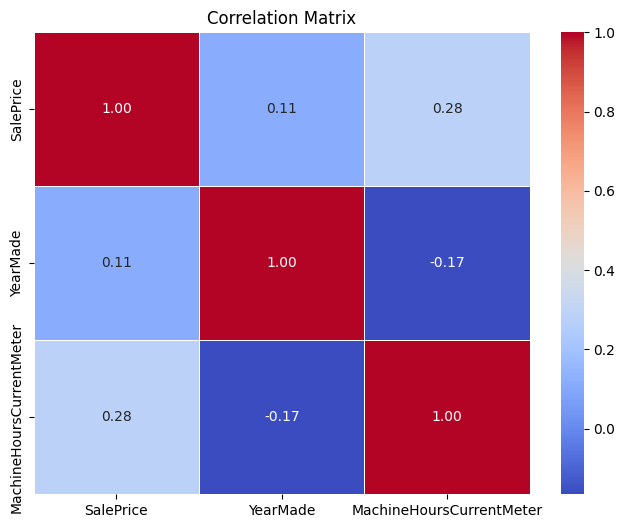

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
data.shape

(401125, 47)

In [ ]:
data.head(3)

,SalePrice,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,66000,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,57000,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,10000,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Sample split for memory effeciency**

In [ ]:
data_split = data[:10000]
data_split.shape

(10000, 47)

In [ ]:
data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalePrice                 10000 non-null  int64  
 1   YearMade                  10000 non-null  int64  
 2   MachineHoursCurrentMeter  10000 non-null  float64
 3   UsageBand                 8735 non-null   object 
 4   fiModelDesc               10000 non-null  object 
 5   fiBaseModel               10000 non-null  object 
 6   fiSecondaryDesc           6545 non-null   object 
 7   fiModelSeries             1376 non-null   object 
 8   fiModelDescriptor         2428 non-null   object 
 9   ProductSize               4630 non-null   object 
 10  fiProductClassDesc        10000 non-null  object 
 11  state                     10000 non-null  object 
 12  ProductGroup              10000 non-null  object 
 13  ProductGroupDesc          10000 non-null  object 
 14  Drive_S

# Imputing **Data**

In [ ]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
for col in object_cols:
    data_split[col] = cat_imputer.fit_transform(data_split[[col]]).ravel()
data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalePrice                 10000 non-null  int64  
 1   YearMade                  10000 non-null  int64  
 2   MachineHoursCurrentMeter  10000 non-null  float64
 3   UsageBand                 10000 non-null  object 
 4   fiModelDesc               10000 non-null  object 
 5   fiBaseModel               10000 non-null  object 
 6   fiSecondaryDesc           10000 non-null  object 
 7   fiModelSeries             10000 non-null  object 
 8   fiModelDescriptor         10000 non-null  object 
 9   ProductSize               10000 non-null  object 
 10  fiProductClassDesc        10000 non-null  object 
 11  state                     10000 non-null  object 
 12  ProductGroup              10000 non-null  object 
 13  ProductGroupDesc          10000 non-null  object 
 14  Drive_S

# **TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X = data_split.drop("SalePrice",axis = 1)
y = data_split["SalePrice"]

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state= 56)

X_train.shape


(8000, 46)

In [ ]:
pip install category_encoders

# **Encoding categorical Features and Scaling**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

scaler = StandardScaler()

for col in object_cols:
    unique_vals = X_train[col].nunique()

    if unique_vals < 5:
        le = LabelEncoder()
        le.fit(X_train[col])

        X_train_encoded[col] = le.transform(X_train[col])
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))

        X_test_encoded[col] = X_test[col].map(mapping)
        X_test_encoded[col] = X_test_encoded[col].fillna(-1).astype(int)

    else:
        target_encoder = ce.TargetEncoder(cols=[col])
        target_encoder.fit(X_train[col], X_train["MachineHoursCurrentMeter"])

        X_train_encoded[col] = target_encoder.transform(X_train[col])
        X_test_encoded[col] = target_encoder.transform(X_test[col])

num_cols = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns

X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])


X_train.head()


,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1479,2001,8202.0,High,330BL,330,B,II,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional
2789,2002,2632.0,High,430D,430,D,II,L,Medium,Backhoe Loader - 15.0 to 16.0 Ft Standard Digg...,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional
5906,1999,2020.0,Low,TB125,TB125,C,II,L,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional
4289,1000,38791.0,High,D8L,D8,L,II,L,Large,"Track Type Tractor, Dozer - 260.0 + Horsepower",...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,None or Unspecified,Lever,Standard,Conventional
3133,2003,1450.0,Low,PC27MR,PC27,MR,II,L,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional


# Model **Training**

In [ ]:
X_train_encoded.head()

,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1479,0.411824,0.699951,-1.802518,1.964560,1.698649,0.675273,-0.178208,-0.097038,1.332328,1.061293,...,-0.005,-0.155186,0.221336,-0.242696,-0.121299,-0.011181,-0.134079,-0.166592,0.062882,0.040344
2789,0.414674,-0.297291,-1.802518,-0.346221,-0.794247,-0.348811,-0.178208,-0.097038,-0.153645,-0.063853,...,-0.005,-0.155186,0.221336,-0.242696,-0.121299,-0.011181,-0.134079,-0.166592,0.062882,0.040344
5906,0.406122,-0.406863,-0.486691,-0.203628,-0.270506,-0.561125,-0.178208,-0.097038,-1.918895,-1.050675,...,-0.005,-0.155186,0.221336,-0.242696,-0.121299,-0.011181,-0.134079,-0.166592,0.062882,0.040344
4289,-2.441572,6.176546,-1.802518,1.323248,1.509858,0.518409,-0.178208,-0.097038,3.336657,1.108635,...,-0.005,-0.155186,0.221336,-0.242696,-0.121299,-0.011181,-0.134079,3.253472,0.062882,0.040344
3133,0.417525,-0.508914,-0.486691,-0.203401,-0.478674,-1.640066,-0.178208,-0.097038,-1.918895,-1.050675,...,-0.005,-0.155186,0.221336,-0.242696,-0.121299,-0.011181,-0.134079,-0.166592,0.062882,0.040344


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


est_dic = {
    "Random Forest" : RandomForestRegressor(n_jobs=-1),
    "XG boost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}
for est_name ,est in est_dic.items():
    est.fit(X_train_encoded,y_train)
    print(f"{est_name} : {est.score(X_test_encoded , y_test)}")

Random Forest : 0.8402551549230253
XG boost : 0.8496124744415283
Gradient Boosting : 0.7908101348539649


# Hyperparameter **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_encoded, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score: -0.8377436796824137


# **Creating model with Whole Data**

In [ ]:
object_cols = []
numerical_cols = []
for col in data.columns:
    if data[col].dtype == "object":
        object_cols.append(col)
    else :
        numerical_cols.append(col)

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy="median")
for col in object_cols:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()

for col in numerical_cols:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()

X = data.drop("SalePrice",axis = 1)
y = data["SalePrice"]

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state= 56)

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

scaler = StandardScaler()

for col in object_cols:
    unique_vals = X_train[col].nunique()

    if unique_vals < 5:
        le = LabelEncoder()
        le.fit(X_train[col])
        X_train_encoded[col] = le.transform(X_train[col])

        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        X_test_encoded[col] = X_test[col].map(mapping)

        X_test_encoded[col] = X_test_encoded[col].fillna(-1).astype(int)

    else:
        target_encoder = ce.TargetEncoder(cols=[col])
        target_encoder.fit(X_train[col], X_train["MachineHoursCurrentMeter"])

        X_train_encoded[col] = target_encoder.transform(X_train[col])
        X_test_encoded[col] = target_encoder.transform(X_test[col])

num_cols = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns

X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])


In [ ]:
model = XGBRegressor()
model.fit(X_train_encoded,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
model.score(X_test_encoded,y_test)

0.7842065095901489

# **Exporting Model**

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)